<a href="https://colab.research.google.com/github/junarwohn/riddle_of_Dr_Noh/blob/main/riddle_of_noh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pickle5
import numpy as np
import pickle5 as pickle
import matplotlib.pyplot as plt
import urllib.request as urllib 

%matplotlib inline

     |████████████████████████████████| 256 kB 5.6 MB/s 


In [2]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset{}'
dataset_idxs = list(range(1,5))

In [3]:
dataset_idxs

[1, 2, 3, 4]

In [28]:
total_train_data = []
total_test_data = []

In [29]:
for idx in dataset_idxs:
  with urllib.urlopen(target_url.format(idx)) as handle:
    data = pickle.load(handle)
    y = pickle.load(handle)
    testdata = pickle.load(handle)
    testy = pickle.load(handle)
    print(data.shape, y.shape)
    total_train_data.append([data, y])
    total_test_data.append([testdata, testy])

(700, 200) (700,)
(200, 80) (200,)
(60000, 784) (60000,)
(200, 100) (200,)


In [6]:
print(len(total_data))

4


In [7]:
data_1, label_1 = total_data[0]

In [8]:
data_1[0][0]

83.79198843706632

In [9]:
for data, label in total_data:
  print(np.unique(label, return_counts=True))

(array([0., 1.]), array([200, 500]))
(array([0., 1.]), array([100, 100]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0., 1.]), array([100, 100]))


In [10]:
np.sqrt(784)

28.0

In [11]:
data_3, label_3 = total_data[2]

In [12]:
data_3_reshaped = data_3.reshape(-1,28,28)

In [13]:
data_3_reshaped.shape

(60000, 28, 28)

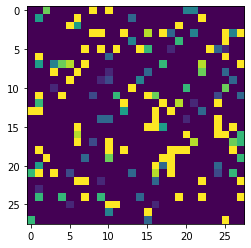

In [14]:
plt.imshow(data_3_reshaped[10])

In [ ]:
for i in range(10):
  plt.plot(data_3[i])
  print(label_3[i])
  plt.show()

In [ ]:
for i in range(10):
  plt.plot(total_data[0][0][i])
  print(total_data[0][1][i])
  plt.show()

In [ ]:
for i in range(10):
  plt.plot(total_data[1][0][i])
  print(total_data[1][1][i])
  plt.show()

In [16]:
total_data = np.array(total_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [24]:
for data in total_data:
  print("y shape", data[1].shape)
  print(np.unique(data[1]))

y shape (700,)
[0. 1.]
y shape (200,)
[0. 1.]
y shape (60000,)
[0 1 2 3 4 5 6 7 8 9]
y shape (200,)
[0. 1.]


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [36]:
classifier.fit(total_train_data[0][0], total_train_data[0][1])


KNeighborsClassifier()

In [37]:
guesses = classifier.predict(total_test_data[0][0])

In [38]:
classifier.score(total_test_data[0][0], total_test_data[0][1])

0.6885714285714286

In [39]:
for train_data, test_data in zip(total_train_data, total_test_data):
  classifier = KNeighborsClassifier(n_neighbors = 5)
  classifier.fit(train_data[0], train_data[1])
  guesses = classifier.predict(test_data[0])
  print(classifier.score(test_data[0], test_data[1]))

0.6885714285714286
0.73
0.9674333333333334
0.85
